귀무가설
 - 서울의 강남과 강북의 부동산중개업 비율이 같다

대립가설
 - 서울의 강남와 강북의 부동산중개업 비율이 다르다

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import scipy.stats as st
from scipy.stats import t
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

In [8]:
df_raw = pd.read_csv('/Users/minsu/Downloads/서울 - 복사본.csv', sep=',' , encoding='utf-8')
df_raw.columns
df=df_raw[['상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '표준산업분류명', '시도명', '시군구명', '행정동명']]

In [9]:
df.rename(columns={'상권업종대분류명':'업종대',
                  '상권업종중분류명':'업종중',
                  '상권업종소분류명':'업종소',
                  '표준산업분류명':'업종표준'}, inplace=True)

/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
df.시군구명.unique()

array(['서초구', '동작구', '종로구', '영등포구', '송파구', '성동구', '성북구', '마포구', '강동구',
       '관악구', '양천구', '강남구', '중랑구', '은평구', '서대문구', '중구', '동대문구', '강북구',
       '광진구', '용산구', '강서구', '구로구', '도봉구', '노원구', '금천구'], dtype=object)

In [11]:
df.업종대.unique()

array(['음식', '소매', '학문/교육', '부동산', '관광/여가/오락', '생활서비스', '숙박', '스포츠'],
      dtype=object)

In [12]:
df.업종중.unique()

array(['한식', '가정/주방/인테리어', '의복의류', '건강/미용식품', '취미/오락관련소매', '학원-보습교습입시',
       '사진/광학/정밀기기소매', '유흥주점', '학원-창업취업취미', '자동차/자동차용품', '부동산중개',
       '도서관/독서실', '커피점/카페', '패스트푸드', '무도/유흥/가무', '주유소/충전소', '종합소매점',
       '닭/오리요리', '자동차/이륜차', 'PC/오락/당구/볼링등', '음/식료품소매', '세탁/가사서비스',
       '선물/팬시/기념품', '이/미용/건강', '사무/문구/컴퓨터', '화장품소매', '기타서비스업', '시계/귀금속소매',
       '가방/신발/액세서리', '가전제품소매', '운동/경기용품소매', '학원-예능취미체육', '학원기타', '일식/수산물',
       '물품기기대여', '제과제빵떡케익', '학문교육기타', '분식', '양식', '사진', '애견/애완/동물',
       '학원-음악미술무용', '대행업', '주택수리', '철물/난방/건설자재소매', '별식/퓨전요리', '모텔/여관/여인숙',
       '호텔/콘도', '의약/의료품소매', '학원-어학', '유아교육', '인력/고용/용역알선', '책/서적/도서',
       '기타음식업', '광고/인쇄', '가구소매', '유아용품', '개인/가정용품수리', '운송/배달/택배',
       '예식/의례/관혼상제', '요가/단전/마사지', '실내운동시설', '운영관리시설', '법무세무회계', '부페',
       '기타판매업', '연극/영화/극장', '개인서비스', '평가/개발/관리', '장례/묘지', '중식', '분양',
       '중고품소매/교환', '대중목욕탕/휴게', '예술품/골동품/수석/분재', '페인트/유리제품소매',
       '학원-자격/국가고시', '스포츠/운동', '음식배달서비스', '종교용품판매', '경마/경륜/성인오락',
       '행사/이벤트', '민박/하숙', '학원

In [13]:
def func(x) :
    if x in ['서초구', '송파구', '강남구' , '양천구' , '관악구' , '강동구' , '동작구', '구로구' , '금천구']:
        return '강남'
    else:
        return '강북'
df.loc[:,'강남북'] = df['시군구명'].apply(lambda x:func(x))

/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [14]:
grouped_업종대=df['업종대']
df_업종대 = grouped_업종대.count()
df_업종대

316078

In [15]:
grouped_부동산중개 = df[df['업종중']=='부동산중개'].groupby(['강남북','시군구명'])
df_부동산중개=grouped_부동산중개.count()
df_부동산중개.head()

업종대   업종중   업종소  업종표준   시도명  행정동명
강남북 시군구명                                    
강남  강남구   1423  1423  1423  1393  1423  1423
    강동구    662   662   662   654   662   662
    관악구    582   582   582   573   582   582
    구로구    430   430   430   427   430   430
    금천구    339   339   339   338   339   339

<AxesSubplot:xlabel='강남북,시군구명'>

/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYL

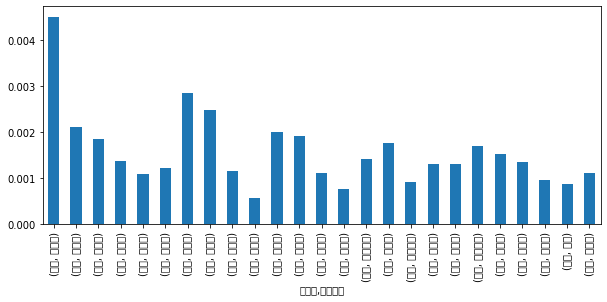

In [16]:
df_부동산비율 = df_부동산중개 / df_업종대
df_부동산비율['업종중'].plot.bar(figsize=(10,4))

In [17]:
df_sample = df_부동산비율.sample(n=12)
df_sample

업종대       업종중       업종소      업종표준       시도명      행정동명
강남북 시군구명                                                            
강북  강서구   0.002003  0.002003  0.002003  0.001955  0.002003  0.002003
강남  강동구   0.002094  0.002094  0.002094  0.002069  0.002094  0.002094
강북  용산구   0.001522  0.001522  0.001522  0.001503  0.001522  0.001522
강남  구로구   0.001360  0.001360  0.001360  0.001351  0.001360  0.001360
강북  마포구   0.001756  0.001756  0.001756  0.001737  0.001756  0.001756
    강북구   0.000557  0.000557  0.000557  0.000554  0.000557  0.000547
강남  관악구   0.001841  0.001841  0.001841  0.001813  0.001841  0.001841
강북  도봉구   0.000747  0.000747  0.000747  0.000728  0.000747  0.000747
    영등포구  0.001683  0.001683  0.001683  0.001655  0.001683  0.001683
    노원구   0.001107  0.001107  0.001107  0.001095  0.001107  0.001107
    종로구   0.000955  0.000955  0.000955  0.000943  0.000955  0.000955
    은평구   0.001341  0.001341  0.001341  0.001313  0.001341  0.001341

강남 강북 6개씩 샘플링

In [18]:
df1 = pd.read_csv('/Users/minsu/Downloads/비율.csv', sep=',' , encoding='utf-8')

In [19]:
model = ols('비율~강남북',df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
강남북,1.0,9.268521e-07,9.268521e-07,2.707466,0.130904
Residual,10.0,3.423319e-06,3.423319e-07,NaN,NaN


분산분석

In [22]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

In [23]:
comp = MultiComparison(df1.비율, df1.강남북)
result = comp.allpairtest(scipy.stats.ttest_ind,method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
강남,강북,1.6454,0.1309,0.1309,False


사후분석

유의수준 5% 이내 p값이 0.1309이므로 귀무가설을 기각하고 대립가설을 채택한다

#2회귀분석주제


서울외유입인구수와 부동산중개업소의 비율이 비례한다

In [27]:
from statsmodels.formula.api import ols

In [28]:
df2 = pd.read_csv('/Users/minsu/Downloads/유입인구부동산.csv', sep=',' , encoding='utf-8')

In [30]:
df2_회귀분석 = ols('서울외유입인구수~부동산수',df2).fit()
df2_회귀분석.summary()

/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               서울외유입인구수   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     42.72
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           9.43e-06
Time:                        12:48:32   Log-Likelihood:                -197.49
No. Observations:                  17   AIC:                             399.0
Df Residuals:                      15   BIC:                             400.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.905e+04    1.5e+04     -1.272      0.223    -5.1e+04    1.29e+04
부동산수          76.6328     11.725      6.536      0.000      51.641     101.624
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.799
Skew:                          -0.257   Prob(JB):                        0.671
Kurtosis:                       2.070   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r2 = 0.740
결론 : 부동산수 및 서울외유입인구수는 비례한다